In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
results_dir = '../results'

Load the results into a pandas dataframe

In [11]:
dir_names = sorted([fname
                    for fname in os.listdir(results_dir)
                    if os.path.isdir(join(results_dir, fname))
                    and os.path.exists(join(results_dir, fname, 'results.pkl'))
                    ])
results_list = []
for dir_name in tqdm(dir_names):
    ser = pd.Series(
        pkl.load(open(join(results_dir, dir_name, 'results.pkl'), "rb")))
    results_list.append(ser)

r = pd.concat(results_list, axis=1).T.infer_objects()
r.to_pickle(join(results_dir, 'results_aggregated.pkl'))

100%|██████████| 8/8 [00:00<00:00, 2283.39it/s]


In [12]:
r

,dataset_name,subsample_frac,seed,save_dir,model_name,alpha,max_depth,use_cache,save_dir_unique,accuracy_train,roc_auc_train,accuracy_cv,roc_auc_cv,accuracy_test,roc_auc_test
0,rotten_tomatoes,1,2,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.565879,0.565674,0.563766,0.564033,0.551595,0.551595
1,rotten_tomatoes,1,1,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.566054,0.566197,0.554529,0.554193,0.558161,0.558161
2,rotten_tomatoes,1,2,/home/chansingh/cookiecutter-ml-research/results,ridge,0.1,2,0,/home/chansingh/cookiecutter-ml-research/resul...,1.000000,1.000000,0.686679,0.686592,0.656660,0.656660
3,rotten_tomatoes,1,1,/home/chansingh/cookiecutter-ml-research/results,ridge,0.1,2,0,/home/chansingh/cookiecutter-ml-research/resul...,1.000000,1.000000,0.675311,0.675282,0.684803,0.684803
4,rotten_tomatoes,1,2,/home/chansingh/cookiecutter-ml-research/results,ridge,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.998250,0.998246,0.725044,0.725003,0.712946,0.712946
5,rotten_tomatoes,1,1,/home/chansingh/cookiecutter-ml-research/results,ridge,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.998250,0.998254,0.727176,0.727154,0.725141,0.725141
6,rotten_tomatoes,1,2,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,3,0,/home/chansingh/cookiecutter-ml-research/resul...,0.572003,0.571777,0.569805,0.570137,0.556285,0.556285
7,rotten_tomatoes,1,1,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,3,0,/home/chansingh/cookiecutter-ml-research/resul...,0.574803,0.575007,0.563055,0.562604,0.557223,0.557223


In [13]:
# average over random seeds
ravg = (
    r
    .groupby(by=[k for k in r.columns if not k == 'seed' and not k.startswith('acc')])
    .mean()
    .reset_index()
)
ravg

,dataset_name,subsample_frac,save_dir,model_name,alpha,max_depth,use_cache,save_dir_unique,roc_auc_train,roc_auc_cv,roc_auc_test,seed,accuracy_train,accuracy_cv,accuracy_test
0,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.565674,0.564033,0.551595,2.0,0.565879,0.563766,0.551595
1,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.566197,0.554193,0.558161,1.0,0.566054,0.554529,0.558161
2,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,3,0,/home/chansingh/cookiecutter-ml-research/resul...,0.571777,0.570137,0.556285,2.0,0.572003,0.569805,0.556285
3,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,3,0,/home/chansingh/cookiecutter-ml-research/resul...,0.575007,0.562604,0.557223,1.0,0.574803,0.563055,0.557223
4,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,ridge,0.1,2,0,/home/chansingh/cookiecutter-ml-research/resul...,1.000000,0.686592,0.656660,2.0,1.000000,0.686679,0.656660
5,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,ridge,0.1,2,0,/home/chansingh/cookiecutter-ml-research/resul...,1.000000,0.675282,0.684803,1.0,1.000000,0.675311,0.684803
6,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,ridge,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.998246,0.725003,0.712946,2.0,0.998250,0.725044,0.712946
7,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,ridge,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.998254,0.727154,0.725141,1.0,0.998250,0.727176,0.725141


In [16]:
# apply cross validation
(
    ravg
    .sort_values(by='accuracy_cv', ascending=False)
    .groupby(by=['model_name', 'dataset_name'])
    .first()
)

,,subsample_frac,save_dir,alpha,max_depth,use_cache,save_dir_unique,roc_auc_train,roc_auc_cv,roc_auc_test,seed,accuracy_train,accuracy_cv,accuracy_test
model_name,dataset_name,,,,,,,,,,,,,
decision_tree,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,1.0,3,0,/home/chansingh/cookiecutter-ml-research/resul...,0.571777,0.570137,0.556285,2.0,0.572003,0.569805,0.556285
ridge,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.998254,0.727154,0.725141,1.0,0.998250,0.727176,0.725141


/home/chansingh/.embgam/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


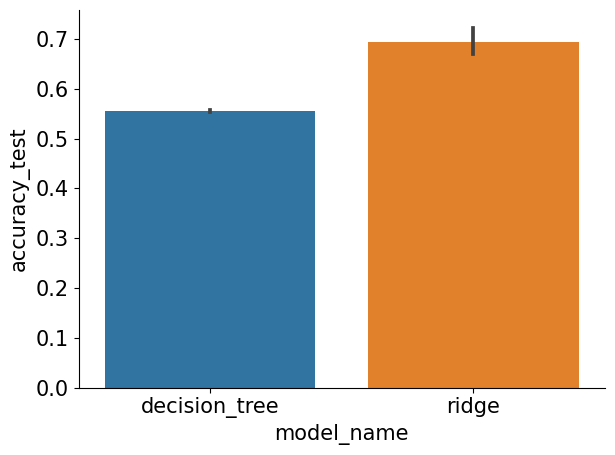

In [18]:
sns.barplot(data=ravg, x='model_name', y='accuracy_test') #, hue='dataset_name')
plt.show()

Load an individual model

In [19]:
run_args = r.iloc[0]
model = pkl.load(open(join(run_args.save_dir_unique, 'model.pkl'), 'rb'))
model

DecisionTreeClassifier(max_depth=2)